In [1]:
import pandas as pd
import numpy as np
from pathlib import PurePosixPath, PureWindowsPath

In [2]:
def get_directory(path):
    if os.name == 'posix':
        return str(PurePosixPath(path))
    else:
        return str(PureWindowsPath(path))

In [3]:
# Variables
FERTILIZER_LOCATION = get_directory('./dataset/fertilizer')
TRAIN_SPLIT = 0.8
INPUT_HEADERS = ['temperature', 'humidity', 'ph', 'rainfall', 'is_maize', 'is_grape', 'is_apple', 'is_orange', 'needs_N', 'needs_P', 'needs_K']

In [4]:
INPUT_HEADERS

['temperature',
 'humidity',
 'ph',
 'rainfall',
 'is_maize',
 'is_grape',
 'is_apple',
 'is_orange',
 'needs_N',
 'needs_P',
 'needs_K']

In [5]:
_fert = pd.read_excel(get_directory(FERTILIZER_LOCATION + '/Fertiliser Prediction.xlsx'))

In [6]:
_fert.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,71,54,16,22.613600,63.690706,5.749914,87.759539,maize
1,61,44,17,26.100184,71.574769,6.931757,102.266244,maize
2,80,43,16,23.558821,71.593514,6.657965,66.719955,maize
3,73,58,21,19.972160,57.682729,6.596061,60.651715,maize
4,61,38,20,18.478913,62.695039,5.970458,65.438354,maize


In [7]:
# Statistics
print(_fert.describe())

                N           P           K  temperature    humidity  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean    35.330000   82.935000  107.450000    22.908862   82.867767   
std     27.342002   52.343197   92.783671     6.258912   11.503319   
min      0.000000    5.000000    5.000000     8.825675   55.282204   
25%     14.000000   33.750000   15.000000    19.723364   78.719580   
50%     29.000000   90.000000  110.000000    22.705257   86.994867   
75%     45.000000  135.000000  200.000000    25.190546   92.049560   
max    100.000000  145.000000  205.000000    41.948657   94.964199   

               ph    rainfall  
count  400.000000  400.000000  
mean     6.304437   94.377141  
std      0.589447   20.206470  
min      5.510925   60.651715  
25%      5.839879   71.424148  
50%      6.206827  102.626226  
75%      6.552920  111.777102  
max      7.995849  124.983162  


In [8]:
# Discretisation
_fert_labels = _fert.drop_duplicates(subset='label').label
_iteration = 0
LABEL_DICTIONARY = {}

# Applying discretisation
_fert['is_maize'] = _fert['label'].apply(lambda x: 1 if x == 'maize' else 0)
_fert['is_grape'] = _fert['label'].apply(lambda x: 1 if x == 'grapes' else 0)
_fert['is_apple'] = _fert['label'].apply(lambda x: 1 if x == 'apple' else 0)
_fert['is_orange'] = _fert['label'].apply(lambda x: 1 if x == 'orange' else 0)
_fert = _fert.drop(['label'], axis=1)

In [9]:
_fert.head()

,N,P,K,temperature,humidity,ph,rainfall,is_maize,is_grape,is_apple,is_orange
0,71,54,16,22.613600,63.690706,5.749914,87.759539,1,0,0,0
1,61,44,17,26.100184,71.574769,6.931757,102.266244,1,0,0,0
2,80,43,16,23.558821,71.593514,6.657965,66.719955,1,0,0,0
3,73,58,21,19.972160,57.682729,6.596061,60.651715,1,0,0,0
4,61,38,20,18.478913,62.695039,5.970458,65.438354,1,0,0,0


In [10]:
_fert_N = _fert[['N', 'temperature', 'humidity', 'ph', 'rainfall', 'is_maize', 'is_grape', 'is_apple', 'is_orange']].copy()
_fert_P = _fert[['P', 'temperature', 'humidity', 'ph', 'rainfall', 'is_maize', 'is_grape', 'is_apple', 'is_orange']].copy()
_fert_K = _fert[['K', 'temperature', 'humidity', 'ph', 'rainfall', 'is_maize', 'is_grape', 'is_apple', 'is_orange']].copy()

In [11]:
_fert_N.rename(columns = {'N': 'output'}, inplace=True)
_fert_P.rename(columns = {'P': 'output'}, inplace=True)
_fert_K.rename(columns = {'K': 'output'}, inplace=True)

In [12]:
# Sanity check
_fert_N

,output,temperature,humidity,ph,rainfall,is_maize,is_grape,is_apple,is_orange
0,71,22.613600,63.690706,5.749914,87.759539,1,0,0,0
1,61,26.100184,71.574769,6.931757,102.266244,1,0,0,0
2,80,23.558821,71.593514,6.657965,66.719955,1,0,0,0
3,73,19.972160,57.682729,6.596061,60.651715,1,0,0,0
4,61,18.478913,62.695039,5.970458,65.438354,1,0,0,0
...,...,...,...,...,...,...,...,...,...
395,27,32.717485,90.546083,7.656978,113.328978,0,0,0,1
396,13,25.162966,92.547360,7.105905,114.311720,0,0,0,1
397,6,27.681673,94.473169,7.199106,113.999515,0,0,0,1
398,40,21.350934,90.949297,7.871063,107.086209,0,0,0,1


In [13]:
_fert_K

,output,temperature,humidity,ph,rainfall,is_maize,is_grape,is_apple,is_orange
0,16,22.613600,63.690706,5.749914,87.759539,1,0,0,0
1,17,26.100184,71.574769,6.931757,102.266244,1,0,0,0
2,16,23.558821,71.593514,6.657965,66.719955,1,0,0,0
3,21,19.972160,57.682729,6.596061,60.651715,1,0,0,0
4,20,18.478913,62.695039,5.970458,65.438354,1,0,0,0
...,...,...,...,...,...,...,...,...,...
395,5,32.717485,90.546083,7.656978,113.328978,0,0,0,1
396,12,25.162966,92.547360,7.105905,114.311720,0,0,0,1
397,7,27.681673,94.473169,7.199106,113.999515,0,0,0,1
398,15,21.350934,90.949297,7.871063,107.086209,0,0,0,1


In [48]:
_fert_N = _fert_N.sample(frac=1).reset_index().drop('index', axis=1)

FERT_N_TRAIN = _fert_N.loc[:int(len(_fert_N) * TRAIN_SPLIT)].reset_index().drop('index', axis=1)
FERT_N_TEST = _fert_N.loc[int(len(_fert_N) * TRAIN_SPLIT):].reset_index().drop('index', axis=1)

FERT_N_TRAIN_FEATURES = FERT_N_TRAIN.copy()
FERT_N_TEST_FEATURES = FERT_N_TEST.copy()

FERT_N_TRAIN_LABEL = FERT_N_TRAIN_FEATURES.pop('output')
FERT_N_TEST_LABEL = FERT_N_TEST_FEATURES.pop('output')

In [49]:
FERT_N_TRAIN

,output,temperature,humidity,ph,rainfall,is_maize,is_grape,is_apple,is_orange
0,81,18.041855,60.614943,5.513698,104.232162,1,0,0,0
1,38,17.543830,82.947033,6.323723,73.770637,0,1,0,0
2,94,23.391282,61.744272,5.871648,107.319813,1,0,0,0
3,18,22.443077,91.592340,6.160267,102.556581,0,0,1,0
4,19,14.780030,91.220621,6.118430,100.196176,0,0,0,1
...,...,...,...,...,...,...,...,...,...
316,34,31.750489,94.595512,7.362208,115.198930,0,0,0,1
317,63,18.518168,55.531281,6.641906,90.988051,1,0,0,0
318,37,26.030973,91.508193,7.511755,101.284774,0,0,0,1
319,38,13.058097,80.282980,5.757010,70.756336,0,1,0,0


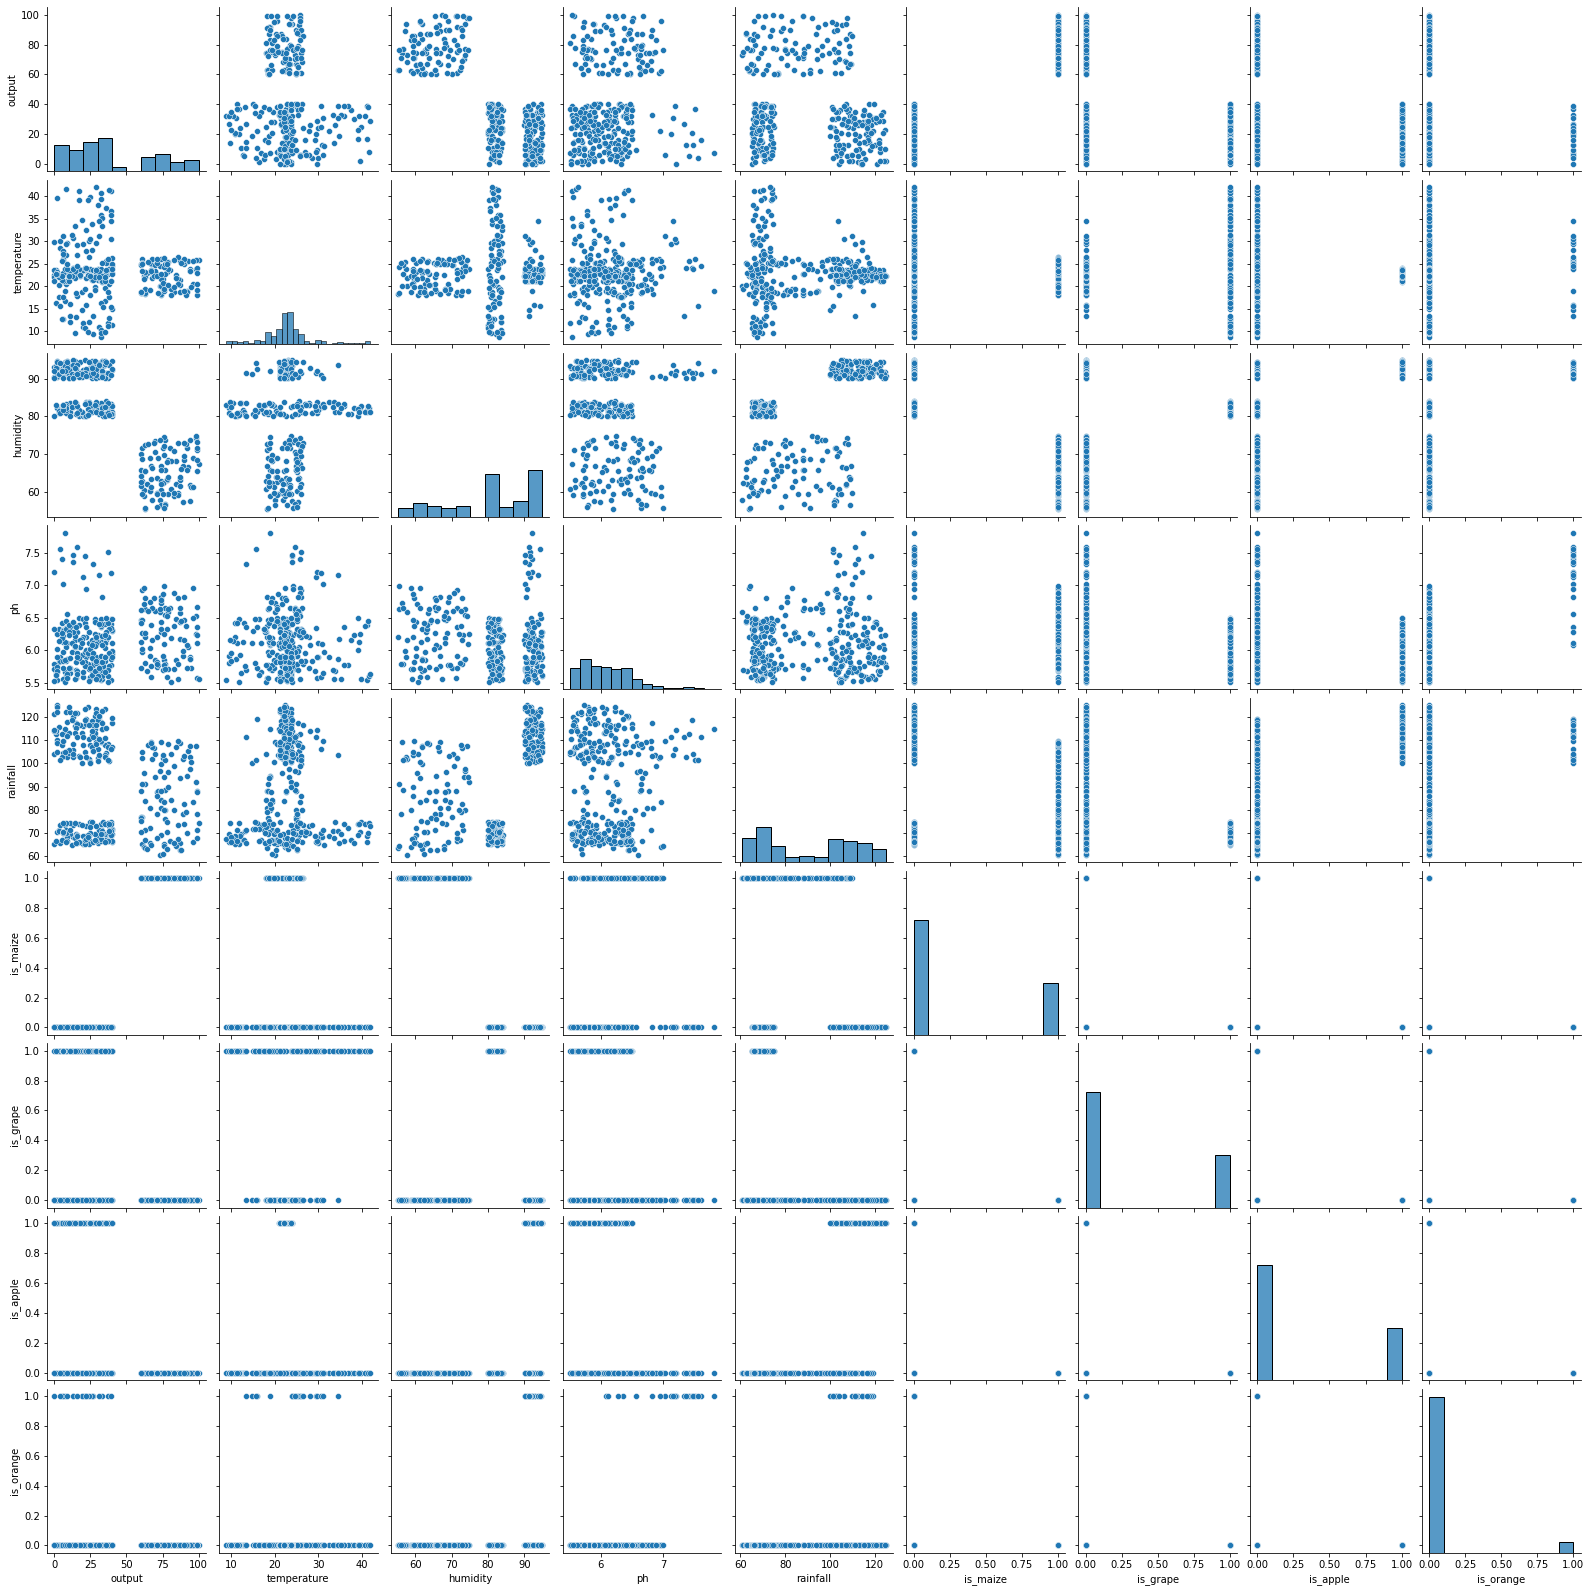

In [15]:
import seaborn as sns
#sns.pairplot(FERT_N_TRAIN)

In [50]:
FERT_N_TRAIN.describe()

,output,temperature,humidity,ph,rainfall,is_maize,is_grape,is_apple,is_orange
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
mean,35.009346,22.550701,82.993194,6.306870,94.368458,0.239875,0.252336,0.255452,0.252336
std,26.731476,6.228176,11.540394,0.593538,20.481845,0.427674,0.435031,0.436796,0.435031
min,0.000000,8.825675,55.282204,5.510925,60.651715,0.000000,0.000000,0.000000,0.000000
25%,15.000000,19.295634,80.066340,5.840256,71.319531,0.000000,0.000000,0.000000,0.000000
50%,29.000000,22.527093,90.039696,6.204748,102.804566,0.000000,0.000000,0.000000,0.000000
75%,40.000000,24.893646,92.032728,6.528631,111.780373,0.000000,1.000000,1.000000,1.000000
max,100.000000,41.948657,94.964199,7.994465,124.983162,1.000000,1.000000,1.000000,1.000000


In [51]:
FERT_N_TEST.describe()

,output,temperature,humidity,ph,rainfall,is_maize,is_grape,is_apple,is_orange
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,36.500000,24.340184,82.512865,6.286084,94.572072,0.287500,0.237500,0.237500,0.237500
std,29.675033,6.175397,11.421807,0.577454,19.103753,0.455452,0.428236,0.428236,0.428236
min,0.000000,10.356096,56.507689,5.534567,62.503519,0.000000,0.000000,0.000000,0.000000
25%,12.000000,21.313144,73.313583,5.810796,73.946549,0.000000,0.000000,0.000000,0.000000
50%,30.000000,23.068335,83.212631,6.229724,102.138401,0.000000,0.000000,0.000000,0.000000
75%,62.750000,26.264860,92.305795,6.625411,108.903772,1.000000,0.000000,0.000000,0.000000
max,99.000000,40.660123,94.737635,7.995849,122.195248,1.000000,1.000000,1.000000,1.000000


In [52]:
FERT_N_TRAIN_FEATURES.shape

(321, 8)

In [53]:
import tensorflow as tf
#fertiliser_train = df_to_dataset(FERTILISER_TRAIN)
#fertiliser_test = df_to_dataset(FERTILISER_TEST)
#dataset = dataset.shuffle(len(_fert)).batch(1)

In [92]:
# TF Normaliser function
normaliser_N = tf.keras.layers.experimental.preprocessing.Normalization()
normaliser_N.adapt(np.array(FERT_N_TRAIN_FEATURES))

In [21]:
FERT_N_TRAIN_FEATURES.shape

(321, 8)

In [27]:
FERT_N_TRAIN_FEATURES.loc[0]

temperature    22.613600
humidity       63.690706
ph              5.749914
rainfall       87.759539
is_maize        1.000000
is_grape        0.000000
is_apple        0.000000
is_orange       0.000000
Name: 0, dtype: float64

In [26]:
normaliser_N(FERT_N_TRAIN_FEATURES.loc[0].values)

<tf.Tensor: shape=(8, 8), dtype=float32, numpy=
array([[-7.3920257e-02, -4.9510045e+00,  3.7217125e+01, -3.3122799e+00,
         4.8156410e+01,  4.8156406e+01,  4.8156414e+01,  9.1189796e+01],
       [ 6.9474258e+00, -1.4412434e+00,  1.2997546e+02, -1.3041129e+00,
         1.3685336e+02,  1.3685336e+02,  1.3685338e+02,  2.5731464e+02],
       [-2.9564452e+00, -6.3918929e+00, -8.6364019e-01, -4.1367078e+00,
         1.1743001e+01,  1.1743000e+01,  1.1743002e+01,  2.2989344e+01],
       [ 1.1061533e+01,  6.1527592e-01,  1.8432655e+02, -1.2744190e-01,
         1.8882471e+02,  1.8882469e+02,  1.8882472e+02,  3.5465430e+02],
       [-3.7683523e+00, -6.7977409e+00, -1.1589669e+01, -4.3689203e+00,
         1.4866068e+00,  1.4866067e+00,  1.4866071e+00,  3.7796447e+00],
       [-3.9392831e+00, -6.8831844e+00, -1.3847821e+01, -4.4178081e+00,
        -6.7267275e-01, -6.7267275e-01, -6.7267275e-01, -2.6457512e-01],
       [-3.9392831e+00, -6.8831844e+00, -1.3847821e+01, -4.4178081e+00,
        -6

In [93]:
# Define model
predict_fert = tf.keras.Sequential([
    normaliser_N,
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(1)
])

predict_fert.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_2 (Normalizati (None, 8)                 17        
_________________________________________________________________
dense_27 (Dense)             (None, 64)                576       
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_28 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 65        
Total params: 4,818
Trainable params: 4,801
Non-trainable params: 17
_________________________________________________________________


In [94]:
predict_fert.compile(
    optimizer = tf.optimizers.Adam(learning_rate=0.1),
    loss = tf.keras.losses.MAE,
    metrics = ['acc']
)

hist = predict_fert.fit(
    FERT_N_TRAIN_FEATURES.values, 
    FERT_N_TRAIN_LABEL.values,
    #fertiliser,
    epochs = 100,
    batch_size=8,
    validation_data=(FERT_N_TEST_FEATURES.values, FERT_N_TEST_LABEL.values)
#    callbacks = [lr_schedule]
 )

Epoch 1/100
41/41 [==============================] - 1s 7ms/step - loss: 22.1290 - acc: 0.0215 - val_loss: 12.5744 - val_acc: 0.0000e+00
Epoch 2/100
41/41 [==============================] - 0s 4ms/step - loss: 16.6594 - acc: 0.0114 - val_loss: 26.3872 - val_acc: 0.0000e+00
Epoch 3/100
41/41 [==============================] - 0s 4ms/step - loss: 19.0331 - acc: 0.0279 - val_loss: 12.1989 - val_acc: 0.0000e+00
Epoch 4/100
41/41 [==============================] - 0s 3ms/step - loss: 17.3135 - acc: 0.0272 - val_loss: 17.1656 - val_acc: 0.0000e+00
Epoch 5/100
41/41 [==============================] - 0s 4ms/step - loss: 18.6245 - acc: 0.0189 - val_loss: 15.1126 - val_acc: 0.0000e+00
Epoch 6/100
41/41 [==============================] - 0s 4ms/step - loss: 19.0094 - acc: 0.0087 - val_loss: 16.6364 - val_acc: 0.0000e+00
Epoch 7/100
41/41 [==============================] - 0s 3ms/step - loss: 13.5510 - acc: 0.0273 - val_loss: 16.4426 - val_acc: 0.0000e+00
Epoch 8/100
41/41 [======================

In [95]:
predict_fert.predict(np.expand_dims(
    FERT_N_TEST_FEATURES.loc[0].values,
    0
    ))

array([[23.17131]], dtype=float32)

In [96]:
predict_fert.predict(np.expand_dims(
    FERT_N_TEST_FEATURES.loc[0].values,
    0
    ))

array([[23.17131]], dtype=float32)

In [97]:
predict_fert.predict(np.expand_dims(FERT_N_TEST_FEATURES.loc[72].values, 0))

array([[21.51732]], dtype=float32)

In [77]:
FERT_N_TEST_FEATURES.loc[77]

temperature     22.484030
humidity        93.408192
ph               5.772180
rainfall       105.547363
is_maize         0.000000
is_grape         0.000000
is_apple         1.000000
is_orange        0.000000
Name: 77, dtype: float64

In [78]:
np.expand_dims(FERT_N_TEST_FEATURES.loc[77].values, 0)

array([[ 22.48403042,  93.40819246,   5.77217995, 105.5473627 ,
          0.        ,   0.        ,   1.        ,   0.        ]])

In [79]:
FERT_N_TEST

,output,temperature,humidity,ph,rainfall,is_maize,is_grape,is_apple,is_orange
0,26,22.445170,94.737635,5.617227,107.184327,0,0,1,0
1,2,23.126527,94.712033,5.893493,108.621183,0,0,1,0
2,37,18.706791,83.479529,6.209928,66.596449,0,1,0,0
3,86,21.541562,59.640242,6.803932,109.751538,1,0,0,0
4,14,21.724845,92.839756,6.056530,121.696176,0,0,1,0
...,...,...,...,...,...,...,...,...,...
75,94,23.891146,57.487758,5.893093,102.830194,1,0,0,0
76,27,32.717485,90.546083,7.656978,113.328978,0,0,0,1
77,27,22.484030,93.408192,5.772180,105.547363,0,0,1,0
78,16,26.916248,80.768389,5.953966,69.309272,0,1,0,0


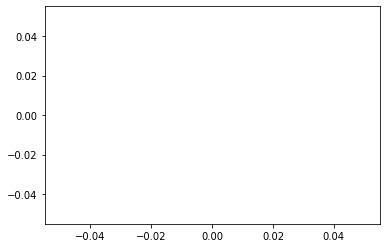

In [29]:
from matplotlib import pyplot as plt

plt.plot(range(len(hist.history['loss'])), hist.history['loss'])
plt.show()

In [28]:
hist.history

{'loss': [0.18927262723445892,
  0.18918836116790771,
  0.18909336626529694,
  0.18898619711399078,
  0.18886560201644897,
  0.1887301355600357,
  0.18857775628566742,
  0.18840639293193817,
  0.18821386992931366,
  0.18799704313278198,
  0.18775340914726257,
  0.1874794214963913,
  0.18717160820960999,
  0.18682576715946198,
  0.18643787503242493,
  0.186003178358078,
  0.18551622331142426,
  0.18497122824192047,
  0.18436217308044434,
  0.18368224799633026,
  0.18292470276355743,
  0.18208079040050507,
  0.18114130198955536,
  0.18009795248508453,
  0.17894195020198822,
  0.177662193775177,
  0.1762455701828003,
  0.17468033730983734,
  0.17295479774475098,
  0.17105832695960999,
  0.1689797341823578,
  0.16670994460582733,
  0.16423088312149048,
  0.16153258085250854,
  0.15860743820667267,
  0.15545153617858887,
  0.1520637571811676,
  0.14844059944152832,
  0.14458300173282623,
  0.1405075639486313,
  0.13623777031898499,
  0.13180546462535858,
  0.12724371254444122,
  0.122578263